# Network Topology versus Network Geometry
Also known as structure.
The connectivity pattern between a small world network
And the experimentally derived mesoscopic rodent connectome is substantially different. You can see this directly in the plots immediately below. 

Sometimes network scientists are less interested in form of a network, or the space it occupies, but they are more interested in the state of the networks constituents, and how each element can effect every other element.

And you can see how statistically the distribution of connection densities are substantially different per neuron in the experimental network versus the small world network.

# Rich club
## Betweeness centrality.
Does anyone remember as they were growing up, their best friend had to move away to a different town?
Imagine that presently you one of your closest friends must move away, and you must choose who, so naturally you might choose the person you would miss the least. You decide to check exhaustively how much you would miss each person you know, except because you are a very altruistic person, you decide, the choice should not be about who 'you', would miss the most, but who your community would miss the most, which is a bit more abstract.

It's difficult for you to come up with criteria, for how to quantify the degree that your community would miss each person, but eventually you decide, that what really harms community is disconnection. You decide the person who should be the least choice for moving, is the ones who maximally connect your social network. This person, themselves does not have to know lots of people in your community, but they should at least now two people, who are friends with most people, and whom would not be connected otherwise.

Unfortunately, the person who receives your list, and whose job it is to act on it, does not understand reverse hierarchical sorting, and they decide to force friend with the highest betweeness centrality, and the communities 'best friend', is forced to leave. Their destination is Gauntamo Bay.

In [14]:
import IPython
from IPython.display import display, Image


url = "https://drpetty.shinyapps.io/AdjacencyMatrix/"
iframe = '<iframe src=' + url + ' width=900 height=700></iframe>'
IPython.display.HTML(iframe)



In [15]:

url = "https://drpetty.shinyapps.io/NetworkVisualization/"
iframe = '<iframe src=' + url + ' width=900 height=700></iframe>'
IPython.display.HTML(iframe)


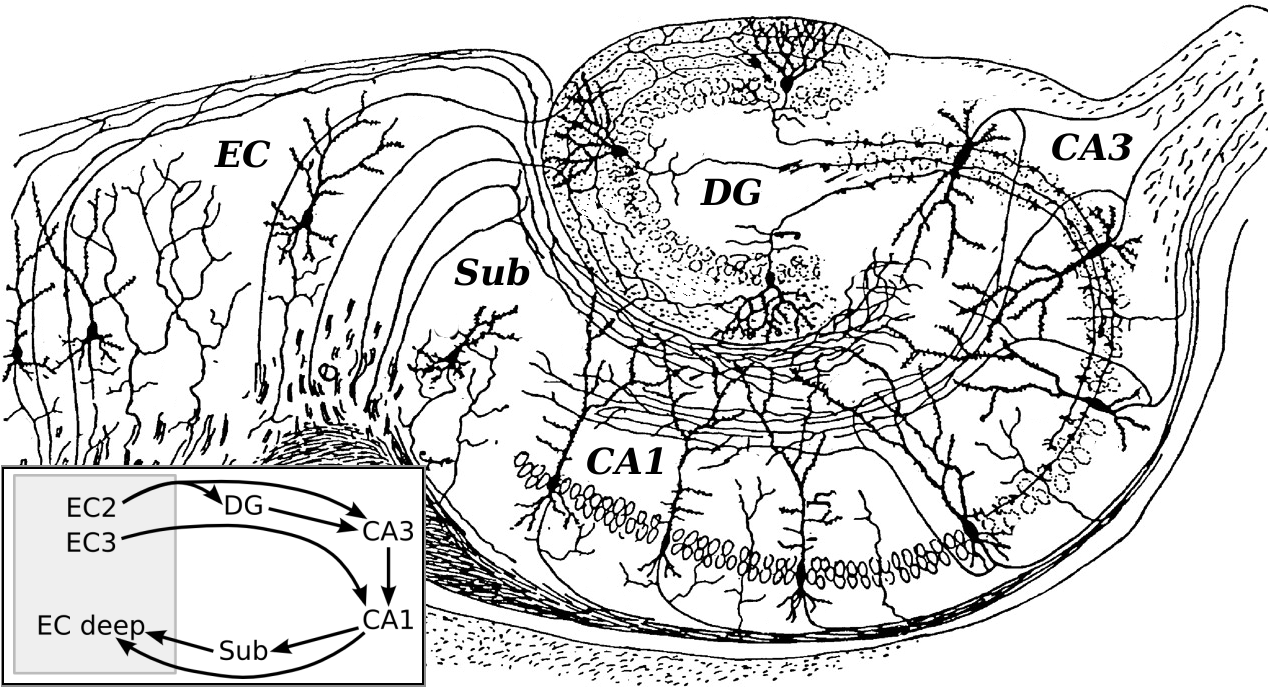

In [16]:
IPython.display.Image("protected_img/CajalHippocampus.png")

# Background 
## on image. 
* relevant to epilpsy. The hippocampus is the source of a very regular and periodic theta rhythym, that can under pathological circumstances dominate the firing pattern of the entire brain.

## Representative only
* figure above comes from sparse staining, incomplete sampling.

* A micro-circuit is only one of [10s-100s] of thousands parallel microcircuits which share the same stereo typed wiring pattern.

* long recording electro physiological and cell staining history
* understood early on link on encoding of new episodic memories, spatial memories and emotions.


#russell made small world network using networkx. parameters include neighbor connections: mean of the out degree + mean of in degree
#connections aren't random in the brain, just incomprehensible

* contrast with matrix view, heat map
* variability of spike trains
* network color coded for heat for CV




This visualisation suite, allows us to make pragmatic decisions about network design.
* prune neurons that don't input connections
There exist neurons with no inputs from the modelled network and their states cannot be influenced by the modelled network, so they are excluded.

Not just a final results analysis, these visualisations are sanity checks of the model, and they help inform model design.

This work subserves multiple functions, I will keep using it as pipeline/tool to prototype and debug biologically informed neuronal networks, as a way of speeding up development.

In [17]:
import networkx as nx
import pickle
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
m = pickle.load( open("bool_matrix.p", "rb"))
exc = pickle.load( open("graph_excit.p", "rb"))
inh = pickle.load( open("graph_inhib.p", "rb"))
assert np.sum(inh) > np.sum(exc)


In [18]:
G = nx.DiGraph(exc)
Gi = nx.DiGraph(inh)

in_degree = G.in_degree()
top_in = sorted(([ (v,k) for k, v in in_degree.items() ]))
in_hub = top_in[-1][1]
out_degree = G.out_degree()
top_out = sorted(([ (v,k) for k, v in out_degree.items() ]))
out_hub = top_out[-1][1]
mean_out = np.mean(list(out_degree.values()))
mean_in = np.mean(list(in_degree.values()))

mean_conns = int(mean_in + mean_out/2)

k = 2 # number of neighbouig nodes to wire.
p = 0.25 # probability of instead wiring to a random long range destination.
ne = len(exc)# size of small world network
small_world_ring_excit = nx.watts_strogatz_graph(ne,mean_conns,0.25)


sw = nx.betweenness_centrality(small_world_ring_excit)
sexc = nx.betweenness_centrality(G)
sinh = nx.betweenness_centrality(Gi)

stop_w = sorted(([ (v,k) for k, v in dict(sw).items() ]), reverse=True)
stop_exc = sorted(([ (v,k) for k, v in dict(sexc).items() ]), reverse=True)
stop_inh = sorted(([ (v,k) for k, v in dict(sinh).items() ]), reverse=True)

degree_w = [ f[0] for f in stop_w ]
degree_i = [ f[0] for f in stop_inh ]




# The Small World Network

/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


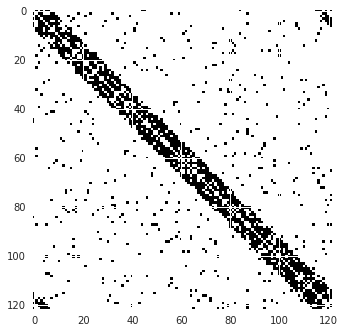

In [19]:

small_world_ring_excit
swm = nx.to_numpy_matrix(small_world_ring_excit)
plt.figure()
plt.show()
plt.imshow(swm)


# The experimentally derived network

/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


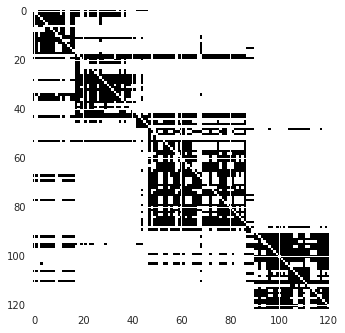

In [20]:

plt.figure()
ms = exc + inh
plt.imshow(ms)

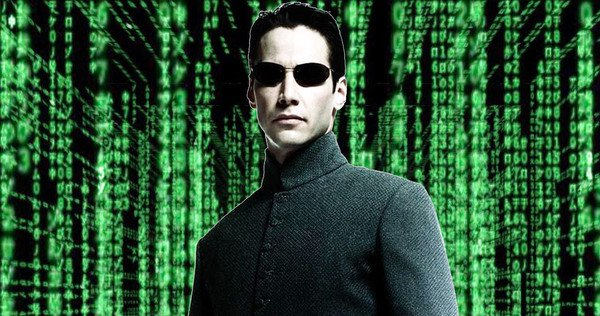

In [22]:
#IPython.display.Image('protected_img/The-Matrix-4-Reboot-Plot-Keanu-Reeves.jpg')


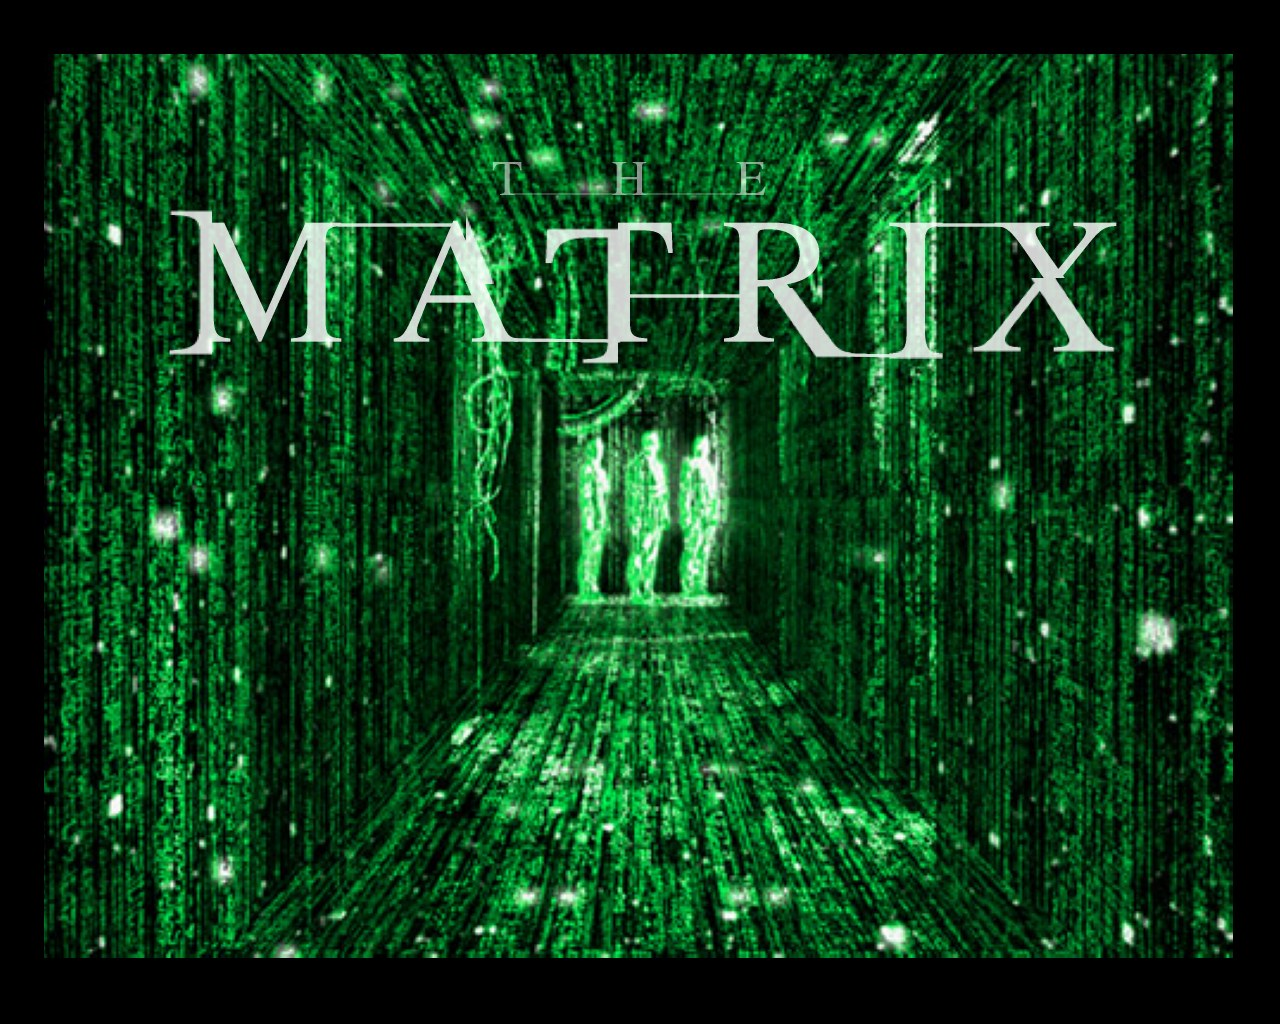

In [23]:
IPython.display.Image('protected_img/thematrix.jpg')

In [ ]:


axis_callw = [ i for i in range(0,len(degree_w)) ]
degree_t = [ f[0] for f in stop_exc ]
axis_callt = [ i for i in range(0,len(degree_t)) ]
plt.figure()
plt.title('Betweeness centrality')
plt.scatter(axis_callw[0:20],degree_w[0:20],label='small world');
plt.scatter(axis_callt[0:20],degree_t[0:20],label='excitatory staining reconstruction');
plt.scatter(axis_callt[0:20],degree_i[0:20],label='inhibitory staining reconstruction');

plt.legend(loc="upper right")

plt.figure()
plt.title('Betweeness centrality')
plt.scatter(axis_callw,degree_w,label='small world');
plt.scatter(axis_callt,degree_t,label='excitatory staining reconstruction');
plt.scatter(axis_callt,degree_i,label='inhibitory staining reconstruction');

plt.legend(loc="upper right")

In [ ]:

Gexc = nx.DiGraph(exc)
Ginh = nx.DiGraph(inh)
m = nx.DiGraph(m)

receivers = m.in_degree()
transmitters = m.out_degree()

top_r = sorted(([ (v,k) for k, v in dict(receivers).items() ]), reverse=True)
top_t = sorted(([ (v,k) for k, v in dict(transmitters).items() ]), reverse=True)
#print(top_r)
ginh = nx.betweenness_centrality(Ginh)
gexc = nx.betweenness_centrality(Gexc)
top_inh = sorted(([ (v,k) for k, v in dict(ginh).items() ]), reverse=True)
top_exc = sorted(([ (v,k) for k, v in dict(gexc).items() ]), reverse=True)

In [ ]:
degree_rec = [ f[0] for f in top_r ]
axis_callr = [ i for i in range(0,len(degree_rec)) ]
degree_t = [ f[0] for f in top_t ]
axis_callt = [ i for i in range(0,len(degree_t)) ]
plt.title('in-degree out-degree')
plt.plot(axis_callr,degree_rec,label='input degree per neuron');
plt.plot(axis_callt,degree_t,label='output degree per neuron');
plt.legend(loc="upper right")

In [ ]:
top10e = top_exc[0:int(len(top_exc)/10)]
top50e = top_exc[0:int(len(top_exc)/2)]
top10i = top_inh[0:int(len(top_inh)/10)]
top50i = top_inh[0:int(len(top_inh)/2)]

In [ ]:
degree_c10e = [ f[0] for f in top10e ]
axis_c10e = [ i for i in range(0,len(degree_c10e)) ]
degree_c50e = [ f[0] for f in top50e ]
axis_c50e = [ i for i in range(0,len(degree_c50e)) ]
degree_c10i = [ f[0] for f in top10i ]
axis_c10i = [ i for i in range(0,len(degree_c10i)) ]
degree_c50i = [ f[0] for f in top50i ]
axis_c50i = [ i for i in range(0,len(degree_c50i)) ]

In [ ]:

plt.clf()
plt.title('betweenness centrality')
plt.plot(axis_c10e,degree_c10e,label='excitatory syn');
plt.plot(axis_c10i,degree_c10i,label='inhibitory syn');
plt.show()

In [ ]:

plt.clf()
plt.title('betweenness centrality')
plt.plot(axis_c50i,degree_c50i,label='inhibitory syn');
plt.plot(axis_c50e,degree_c50e,label='excitatory syn');
plt.legend(loc="upper right")
plt.show()


In [ ]:
degree_calle = [ f[0] for f in top_exc ]
axis_calle = [ i for i in range(0,len(top_exc)) ]
degree_calli = [ f[0] for f in top_inh ]
axis_calli = [ i for i in range(0,len(top_inh)) ]
plt.plot(axis_calle,degree_calle,label='excitatory');
plt.plot(axis_calli,degree_calli,label='inhibitory');
plt.legend(loc="upper right")


# Network Dynamics
## How the network behaves: 
### and how the individual neurons ...
and the network comprized by behave them behave 
When you 'tickle' neurons with noise.
'Tickle', stimulate with noisy current injection values
with mean value slightly below rheobase, and mean+variance of noise current stim, often well above 
rheobase.

#beyond their queiescent operation region.

In [ ]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import IPython

import matplotlib.pyplot as plt
#%matplotlib inline


#from Tkinter import Canvas
from IPython.display import display, Image
import numpy as np
import os
base_dir = os.getcwd() +str('/protected_img')
try:
    os.chdir(base_dir)
except:
    pass

def plot_raster(tf):
    import glob
    toggle_files = glob.glob('*raster*.png')
    toggle_files = toggle_files[::-1]
    keyed = { k:v for k,v in enumerate(toggle_files) }
    wgf = {0:1,1:3,2:9,3:15,4:20}
    print('slider value was',tf)
    print('weight value was',wgf[tf])
    display(Image(str(keyed[tf])))

    
interact(plot_raster, tf = widgets.IntSlider(
    value=0,
    min=0,
    max=4,
    step=1,
    description='Test:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
))

In [ ]:


def plot_cvs(tf):
    import glob
    toggle_files = glob.glob('*cvs_mean*.png')
    toggle_files = toggle_files[::-1]

    keyed = { k:v for k,v in enumerate(toggle_files) }
    wgf = {0:1,1:3,2:9,3:15,4:20}
    print('slider value was',tf)
    print('weight value was',wgf[tf])
    display(Image(str(keyed[tf])))

    
interact(plot_cvs, tf = widgets.IntSlider(
    value=0,
    min=0,
    max=4,
    step=1,
    description='Test:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
))

In [ ]:

def plot_cvs(tf):
    import glob
    toggle_files = glob.glob('*firing_rates_per_cell_*.png')
    toggle_files = toggle_files[::-1]

    keyed = { k:v for k,v in enumerate(toggle_files) }
    wgf = {0:1,1:3,2:9,3:15,4:20}
    print('slider value was',tf)
    print('weight value was',wgf[tf])
    display(Image(str(keyed[tf])))

    
interact(plot_cvs, tf = widgets.IntSlider(
    value=0,
    min=0,
    max=4,
    step=1,
    description='Test:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
))


In [ ]:


def plot_cvs(tf):
    import glob
    toggle_files = glob.glob('*multivariate_PSTH*.png')
    toggle_files = toggle_files[::-1]
    print(toggle_files)

    keyed = { k:v for k,v in enumerate(toggle_files) }
    wgf = {0:1,1:3,2:9,3:15,4:20}
    print('slider value was',tf)
    print('weight value was',wgf[tf])
    display(Image(str(keyed[tf])))

    
interact(plot_cvs, tf = widgets.IntSlider(
    value=0,
    min=0,
    max=4,
    step=1,
    description='Test:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
))

In [ ]:


def plot_cvs(tf):
    import glob
    toggle_files = glob.glob('*spike_distance_matrix*.png')
    toggle_files = toggle_files[::-1]

    keyed = { k:v for k,v in enumerate(toggle_files) }
    wgf = {0:1,1:3,2:9,3:15,4:20}
    print('slider value was',tf)
    print('weight value was',wgf[tf])
    display(Image(str(keyed[tf])))

    
interact(plot_cvs, tf = widgets.IntSlider(
    value=0,
    min=0,
    max=4,
    step=1,
    description='Test:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
))

In [ ]:


def plot_cvs(tf):
    import glob
    toggle_files = glob.glob('*weight_*analogsignals*.png')
    toggle_files = list(filter(lambda x:'specific' not in x, toggle_files))
    toggle_files = list(filter(lambda x:'projections' not in x, toggle_files))

    print(toggle_files)
    toggle_files = toggle_files[::-1]

    keyed = { k:v for k,v in enumerate(toggle_files) }
    wgf = {0:1,1:3,2:9,3:15,4:20,5:30,6:40,7:10}
    print('slider value was',tf)
    print('weight value was',wgf[tf])
    display(Image(str(keyed[tf])))

    
interact(plot_cvs, tf = widgets.IntSlider(
    value=0,
    min=0,
    max=7,
    step=1,
    description='Test:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
))

In [ ]:


def plot_cvs(tf):
    import glob
    toggle_files = glob.glob('*cluster_spike_distance*.png')
    toggle_files = toggle_files[::-1]

    keyed = { k:v for k,v in enumerate(toggle_files) }
    wgf = {0:1,1:3,2:9,3:15,4:20}
    print('slider value was',tf)
    print('weight value was',wgf[tf])
    display(Image(str(keyed[tf])))

    
interact(plot_cvs, tf = widgets.IntSlider(
    value=0,
    min=0,
    max=4,
    step=1,
    description='Test:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
))